# Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import os
import sys
from database.queries import get_all_users
from dataframe_builder import build_user_dataframe

In [2]:
df = build_user_dataframe(1) #training data set
# df.head(5)

In [3]:
chest_df = df[df['exercise'] == 'Barbell Bench Press']
chest_df

,session_id,training_day,date,body_weight,mood,dchest,arms,waist,legs,shoulders,training_duration_minutes,sleep_hours,stress_level,program_phase,exercise,muscle_group,weight,reps,volume
1,1,FULLBODY1,2012-01-02,70.1,tired,82.8,25.2,60.4,45.7,98.6,71.5,6.4,3,deload,Barbell Bench Press,chest,39.9,8,319.2
22,4,FULLBODY1,2012-01-09,70.3,okay,85.4,24.0,60.9,45.6,98.4,55.1,7.8,1,hypertrophy,Barbell Bench Press,chest,47.5,7,332.5
43,7,FULLBODY1,2012-01-15,70.2,okay,85.3,24.5,59.2,47.3,97.5,58.0,7.6,2,hypertrophy,Barbell Bench Press,chest,42.5,8,340.0
64,10,FULLBODY1,2012-01-23,70.6,tired,84.5,24.5,61.2,46.1,100.1,59.9,6.5,2,hypertrophy,Barbell Bench Press,chest,40.9,10,409.0
85,13,FULLBODY1,2012-01-30,70.5,good,83.9,24.4,60.7,45.6,99.8,61.2,8.8,1,hypertrophy,Barbell Bench Press,chest,47.5,9,427.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,1987,FULLBODY1,2024-09-09,110.3,tired,134.0,38.5,94.6,71.9,154.6,64.5,6.3,3,hypertrophy,Barbell Bench Press,chest,1185.0,8,9480.0
13924,1990,FULLBODY1,2024-09-14,110.4,tired,133.0,39.4,93.6,71.9,154.0,66.3,6.1,1,hypertrophy,Barbell Bench Press,chest,1582.5,6,9495.0
13945,1993,FULLBODY1,2024-09-23,110.4,okay,133.6,38.2,92.6,71.1,152.4,65.5,7.9,1,deload,Barbell Bench Press,chest,1187.5,8,9500.0
13966,1996,FULLBODY1,2024-09-30,110.7,okay,132.8,38.0,95.7,70.6,154.2,59.0,7.4,3,hypertrophy,Barbell Bench Press,chest,1357.5,7,9502.5


In [4]:
y = chest_df['volume']
chest_df = chest_df.drop(columns =['session_id', 'date', 'training_day','weight', 'reps','volume','exercise', 'muscle_group'], axis = 1)

In [5]:
chest_df

,body_weight,mood,dchest,arms,waist,legs,shoulders,training_duration_minutes,sleep_hours,stress_level,program_phase
1,70.1,tired,82.8,25.2,60.4,45.7,98.6,71.5,6.4,3,deload
22,70.3,okay,85.4,24.0,60.9,45.6,98.4,55.1,7.8,1,hypertrophy
43,70.2,okay,85.3,24.5,59.2,47.3,97.5,58.0,7.6,2,hypertrophy
64,70.6,tired,84.5,24.5,61.2,46.1,100.1,59.9,6.5,2,hypertrophy
85,70.5,good,83.9,24.4,60.7,45.6,99.8,61.2,8.8,1,hypertrophy
...,...,...,...,...,...,...,...,...,...,...,...
13903,110.3,tired,134.0,38.5,94.6,71.9,154.6,64.5,6.3,3,hypertrophy
13924,110.4,tired,133.0,39.4,93.6,71.9,154.0,66.3,6.1,1,hypertrophy
13945,110.4,okay,133.6,38.2,92.6,71.1,152.4,65.5,7.9,1,deload
13966,110.7,okay,132.8,38.0,95.7,70.6,154.2,59.0,7.4,3,hypertrophy


In [6]:
chest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 1 to 13987
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   body_weight                667 non-null    float64
 1   mood                       667 non-null    object 
 2   dchest                     667 non-null    float64
 3   arms                       667 non-null    float64
 4   waist                      667 non-null    float64
 5   legs                       667 non-null    float64
 6   shoulders                  667 non-null    float64
 7   training_duration_minutes  667 non-null    float64
 8   sleep_hours                667 non-null    float64
 9   stress_level               667 non-null    int64  
 10  program_phase              667 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 62.5+ KB


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = chest_df.select_dtypes(exclude="object").columns
cat_features = chest_df.select_dtypes(include="object").columns

Scaler = StandardScaler()
Encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", Encoder, cat_features),
        ("StandardScaler", Scaler, num_features)
    ]
)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = chest_df.select_dtypes(include="object").columns

Encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", Encoder, cat_features)
    ],
    remainder="passthrough"  # leave numeric features
)

In [9]:
X = preprocessor.fit_transform(chest_df)
X

array([[ 0. ,  0. ,  1. , ..., 71.5,  6.4,  3. ],
       [ 0. ,  1. ,  0. , ..., 55.1,  7.8,  1. ],
       [ 0. ,  1. ,  0. , ..., 58. ,  7.6,  2. ],
       ...,
       [ 0. ,  1. ,  0. , ..., 65.5,  7.9,  1. ],
       [ 0. ,  1. ,  0. , ..., 59. ,  7.4,  3. ],
       [ 0. ,  1. ,  0. , ..., 63.2,  7.2,  6. ]], shape=(667, 14))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape


((533, 14), (134, 14))

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluete Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    model_list.append(name)
    r2_list.append(model_test_r2)
    print(name)
    print('Model performance for Training set')
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- Root Mean Squered Error: {:.4f}'.format(model_train_rmse))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- Root Mean Squered Error: {:.4f}'.format(model_test_rmse))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    print('='*35)
    print('\n')






Linear Regression
Model performance for Training set
- Mean Absolute Error: 169.2139
- Root Mean Squered Error: 202.0930
- R2 Score: 0.9940
----------------------------------
Model performance for Test set
- Mean Absolute Error: 178.7100
- Root Mean Squered Error: 218.7888
- R2 Score: 0.9937


Lasso
Model performance for Training set
- Mean Absolute Error: 169.4323
- Root Mean Squered Error: 202.1909
- R2 Score: 0.9939
----------------------------------
Model performance for Test set
- Mean Absolute Error: 177.8871
- Root Mean Squered Error: 218.1704
- R2 Score: 0.9938


Ridge
Model performance for Training set
- Mean Absolute Error: 169.2338
- Root Mean Squered Error: 202.0948
- R2 Score: 0.9940
----------------------------------
Model performance for Test set
- Mean Absolute Error: 178.7319
- Root Mean Squered Error: 218.8185
- R2 Score: 0.9937


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 127.7907
- Root Mean Squered Error: 165.6803
- R2 Score: 0.

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.997029
6,XGBRegressor,0.996557
8,AdaBoost Regressor,0.995746
7,CatBoosting Regressor,0.995697
4,Decision Tree,0.994947
1,Lasso,0.993751
0,Linear Regression,0.993716
2,Ridge,0.993714
3,K-Neighbors Regressor,0.993090


In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.37


Text(0, 0.5, 'Predicted')

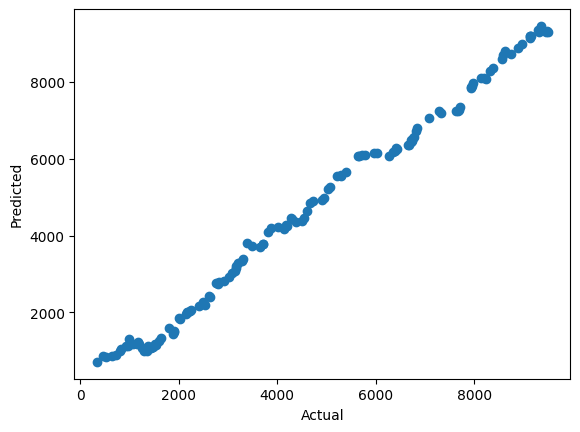

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

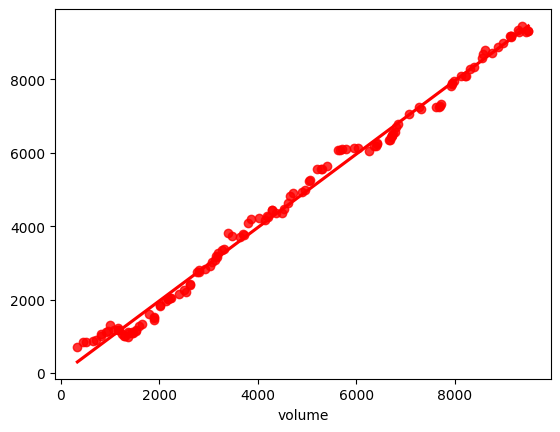

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
13861,9450.0,9305.574931,144.425069
3319,2535.0,2202.019864,332.980136
13315,9125.0,9182.448441,-57.448441
4936,3482.5,3733.085942,-250.585942
13336,9135.0,9179.875834,-44.875834
...,...,...,...
11257,7700.0,7265.046901,434.953099
8758,6030.0,6138.473448,-108.473448
9766,6685.0,6358.521398,326.478602
4432,3172.5,3166.185816,6.314184
